In [ ]:
"""
Names: Max Bongers, Harshita Choudhary, Amal Salman, Laurens Prast
Group: 3
Date: 03-07-2022
Course: Complex System Simulation
Description: This file generates and simulates a criminal network which evolves and changes over time.
"""

In [1]:
import networkx as nx
import numpy as np
import random as rd
import pandas as pd
import matplotlib.pyplot as plt
import operator
from collections import Counter
from math import ceil
import funcs

from funcs import *

# Simulations on network

In [2]:
# Change disruption strategy and recovery strategy here
###### Recovery:
# distance_recovery
# degree_recovery
# random_recovery

###### Removal
# removal_random
# removal_highest_degree
# removal_highest_betweeness
# disrupt_VC_degree
# disrupt_VC_degree_weighted
# disrupt_VC_role

n_nodes_removal = 5
n_simulations = 2
disruption_strat = removal_random
recovery_strat = degree_recovery
network = "macro" # or "value-chain" value chain is a lot faster

In [3]:
if network == "macro":
    giant_components_random_degree, efficiencies_random_degree, densities_random_degree, distances_random_degree = \
    simulate_macro_VC(n_nodes_removal,n_simulations, removal_random, degree_recovery)
elif network == "value-chain":
    giant_components_random_degree, efficiencies_random_degree, densities_random_degree, distances_random_degree = \
    simulate(n_nodes_removal,n_simulations, removal_random, degree_recovery)  

# dictionary with list object in values
details = get_dict_sim_details(disruption_strat.__name__,recovery_strat.__name__,efficiencies_random_degree, \
        densities_random_degree,n_simulations,n_nodes_removal,1)

# creating a Dataframe object 
df = pd.DataFrame(details)
df = df[df['disruption'] != "random"]
df = df.append(details, ignore_index=True)

n_cycles = np.arange(n_nodes_removal)

#Average of efficiency with std over multiple sims
total_efficiency1_total = efficiencies_random_degree.reshape(n_simulations,n_nodes_removal)   
total_efficiency1_mean = np.mean(total_efficiency1_total, axis=0)
total_efficiency1_std = np.std(total_efficiency1_total, axis=0)

#Average of denisity with std over multiple sims
total_density1_total = densities_random_degree.reshape(n_simulations,n_nodes_removal)   
total_density1_mean = np.mean(total_density1_total, axis=0)
total_density1_std = np.std(total_density1_total, axis=0)

Simulation 1
Cycle  1
Cycle  2
Cycle  3
Cycle  4
Cycle  5


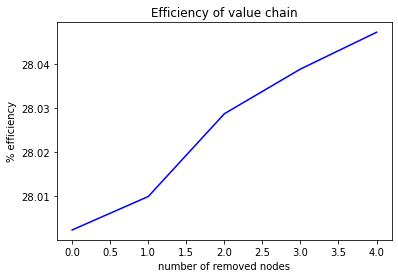

In [15]:
n_cycles = np.arange(n_nodes_removal)

#Average of efficiency with std over multiple sims
plt.plot(n_cycles, total_efficiency1_mean, label='Removal of random node', color='b')
plt.fill_between(n_cycles, total_efficiency1_mean - total_efficiency1_std, total_efficiency1_mean + total_efficiency1_std, color='b', alpha=0.05)
plt.title('Efficiency of value chain')
plt.ylabel('% efficiency')
plt.xlabel('number of removed nodes')
plt.legend()
plt.show()


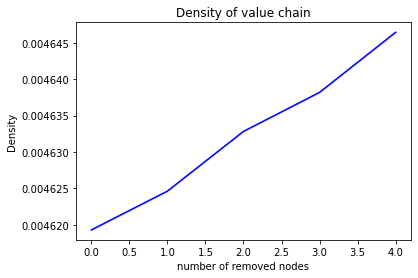

In [16]:
#Average of denisity with std over multiple sims
plt.plot(n_cycles, total_density1_mean, label='Removal of random node', color='b') 
plt.fill_between(n_cycles, total_density1_mean - total_density1_std, total_density1_mean + total_density1_std, color='b', alpha=0.2)
plt.title('Density of value chain')
plt.ylabel('Density')
plt.xlabel('number of removed nodes')
plt.legend()
plt.show()

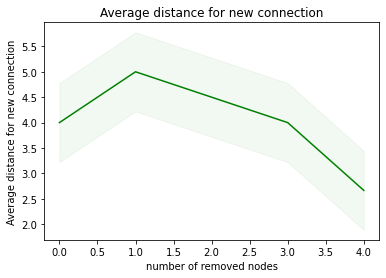

In [17]:
def distonce(obj, col):
    totdist = []
    for i in (obj):
        for j in i:
            totdist.append(np.mean(j))
    totdist = np.array(totdist)
    totdist = totdist.reshape(n_simulations,n_nodes_removal)
    plt.plot(n_cycles, np.mean(totdist, axis=0), color=col)
    plt.fill_between(n_cycles, np.mean(totdist, axis=0) - np.std(np.mean(totdist, axis=0)), np.mean(totdist, axis=0) + np.std(np.mean(totdist, axis=0)), color=col, alpha=0.05)
    plt.title('Average distance for new connection')
    plt.ylabel('Average distance for new connection')
    plt.xlabel('number of removed nodes')

colorlist = ['b', 'g','r','y','black','orange']
distonce(distances_random_degree, colorlist[1])
plt.show()